This notebook show example use cases of cells lies lies next to bone in different regions endosteal, peritrabecular and intertrabecualr 

In [3]:
import os
from tqdm import tqdm
import spatialdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import anndata as ad
import spatialdata_plot

import sys
sys.path.append('..')
from configuration import STConfig
from wrappers.sdata_initalizer import SDataInitalizer
from wrappers.sdata_customizer import SDataCustomizer

from utils.utils_colors import cn_color_palette
from utils.utils_geom import align_sample_polygons

### Loading Configuration

In [4]:
cfg = STConfig()
meta_df = pd.read_csv(cfg.pth_meta_csv)
samples = meta_df['sample_key'].tolist()
print(f'Number of samples {len(samples)}')
print(samples)

Number of samples 32
['10693_R2', '10693_R1', '16832_R1', '16832_R2', '16818_R2', '16818_R1', '16818_R3', '18552_R3', '18552_R1', '18552_R2', '18550_R1', '18550_R3', '18550_R2', '18606_R2', '18606_R3', '18606_R1', '18599_R3', '18599_R1', '18599_R2', '18286_R3', '18286_R2', '18286_R1', '18256_R3', '18256_R1', '18256_R2', '18612_R1', '18612_R4', '18612_R2', '18612_R3', '18669_R3', '18669_R2', '18669_R1']


In [9]:
cfg.pth_sdata

PosixPath('/well/rittscher/users/qdv200/MPN/xenium/data/july_sdata')

0it [00:00, ?it/s]

Visualizing Manual Annotation for sample 10693_R1


/well/rittscher/users/qwi813/conda/skylake/envs/xenium_env2/lib/python3.10/site-packages/spatialdata_plot/pl/basic.py:869: UserWarning: Converting copy of 'bone_region' column to categorical dtype for categorical plotting. Consider converting before plotting.
  _render_shapes(


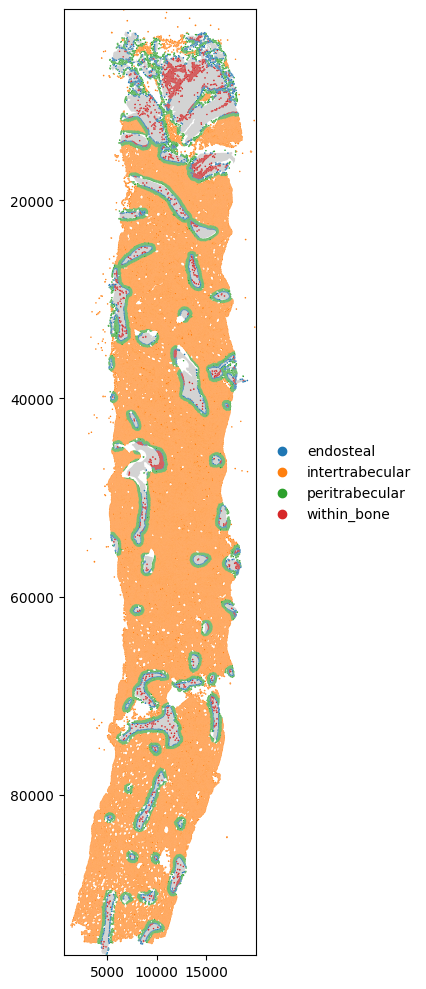

1it [04:18, 258.63s/it]

Visualizing Manual Annotation for sample 10693_R1


/well/rittscher/users/qwi813/conda/skylake/envs/xenium_env2/lib/python3.10/site-packages/spatialdata_plot/pl/basic.py:869: UserWarning: Converting copy of 'bone_region' column to categorical dtype for categorical plotting. Consider converting before plotting.
  _render_shapes(


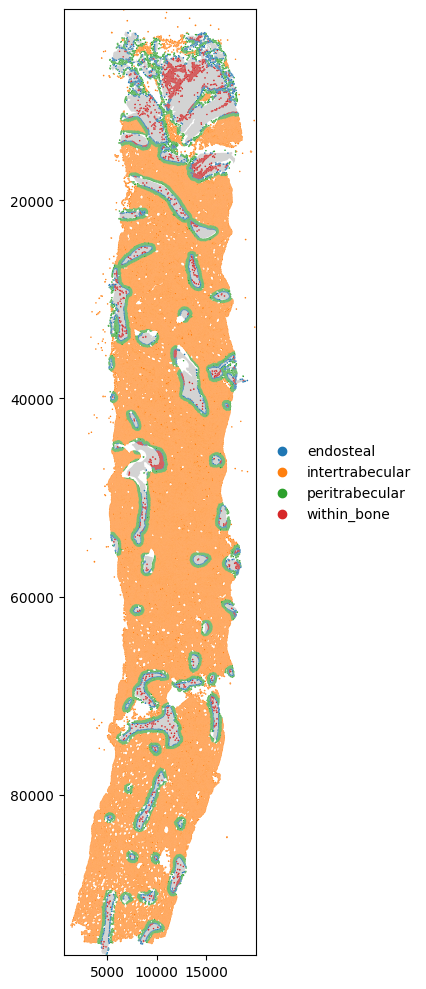

2it [07:34, 227.45s/it]


In [ ]:
# To make notebook size managable we show only 3 random samples
N_samples = 2
samples = np.array(samples)
samples = list(samples[np.random.randint(0, len(samples), N_samples)]) + ['10693_R1']

figsize = (2, 6)   

cell_color_dict_rgb = {
    k: mcolors.to_rgba(v) 
    for k, v in cn_color_palette.items()
}

for idx, sample_id in tqdm(enumerate(samples)):
    print(f'Visualizing Manual Annotation for sample {sample_id}')
    customizer = SDataCustomizer(config=cfg, sample_key=sample_id)
    sdata_file_path = f'{cfg.pth_sdata}_with_adipocytes/{sample_id}_with_it_cellularity.zarr'
    sdata_obj = spatialdata.read_zarr(sdata_file_path)

    f, ax = plt.subplots(1, 1, figsize=(10, 10))
    sdata_obj.pl.render_shapes("transformed_bone").pl.show("global", ax=ax, title="")
    sdata_obj.pl.render_shapes("new_cell_boundaries_with_adipocytes", color="bone_region").pl.show("global", ax=ax, title="")
    plt.tight_layout()
    plt.show()


### Showing a zoomed in region for detailed illustration

In [11]:
bb_xmin = 5000
bb_ymin = 70000
bb_w = 5000
bb_h = 10000
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

cropped_sdata = sdata_obj.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="global",
)

cropped_sdata

SpatialData object
├── Images
│     └── 'morphology_focus': DataTree[cyx] (1, 10000, 5000), (1, 5000, 2500), (1, 2500, 1250), (1, 1250, 625), (1, 625, 313)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (10000, 5000), (5000, 2500), (2500, 1250), (1250, 625), (625, 313)
│     └── 'nucleus_labels': DataTree[yx] (10000, 5000), (5000, 2500), (2500, 1250), (1250, 625), (625, 313)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (18761, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (18549, 2) (2D shapes)
│     ├── 'intertrabecular_regions': GeoDataFrame shape: (5, 1) (2D shapes)
│     ├── 'new_cell_boundaries': GeoDataFrame shape: (18742, 1) (2D shapes)
│     ├── 'new_cell_boundaries_with_adipocytes': GeoDataFrame shape: (18821, 1) (2D shapes)
│     ├── 'new_cell_boundaries_with_full_adipocytes': GeoDataFrame shape: (18824, 1) (2D shapes)
│     ├── 'new_cell_boundaries_without_ad

/well/rittscher/users/qwi813/conda/skylake/envs/xenium_env2/lib/python3.10/site-packages/spatialdata_plot/pl/basic.py:869: UserWarning: Converting copy of 'bone_region' column to categorical dtype for categorical plotting. Consider converting before plotting.
  _render_shapes(


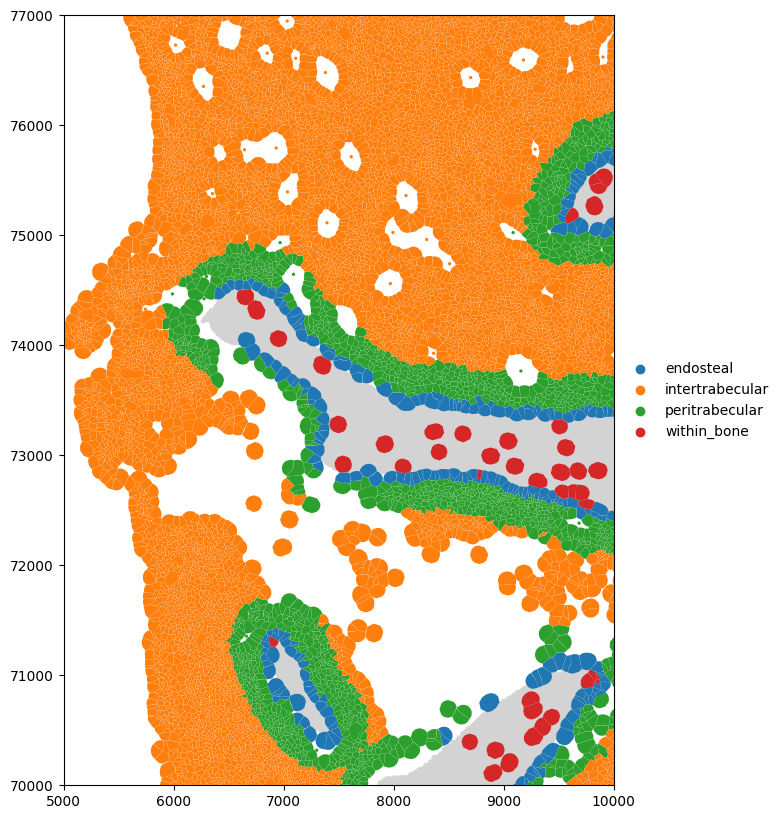

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))

cropped_sdata.pl.render_shapes("transformed_bone").pl.show("global", ax=ax, title="")
cropped_sdata.pl.render_shapes("new_cell_boundaries_with_adipocytes", color="bone_region").pl.show("global", ax=ax, title="")

# seting x and y range
plt.xlim(bb_xmin, bb_xmax)
plt.ylim(70000, 77000)
plt.show()